___
# Atividade: Teste de permutação
___

## Aula 23

## Contexto Teórico


**Preparo Prévio:**
1. Significância - https://pt.wikipedia.org/wiki/Signific%C3%A2ncia_estat%C3%ADstica
1. Teste A/B - https://pt.wikipedia.org/wiki/Teste_A/B

**Hoje:**
1. Entender e implementar o método não paramétrico de permutação com intuito de comparar dois parâmetros populacionais quaisquer a partir de reamostragem.


___

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random



___
## Teste de permutação

O teste de permutação permite fazer estatísticas de *duas amostras*, por exemplo para concluir se medidas populacionais são diferentes entre os dois grupos A e B. Leia aqui que a estatística calculada para ser comparada entre os grupos pode ser: média, mediana, variância, entre outros.

Junto com o *bootstrap*, pertencem às técnicas de análise estatística por **reamostragem**.

Não há qualquer informação acerca do desvio padrão populacional. Ainda, a amostra contém poucos dados. Para concluir se a hipótese nula será ou não rejeitada, antes de realizar um teste convencional, uma metodologia interessante para inferir é via **Teste de Permutação**.

Nesse teste, a ideia consiste em permutar os dados, ou seja, embaralhar os valores contidos em $x_A$ e/ou $x_B$ e criar novas amostras (reamostras). 

### Caso 1 - amostras independentes 
Ambas as amostras possuem a mesma unidade de medida e a ordem dos elementos nas amostras não é importante (ou seja, e são independentes).

**Passo-a-passo:**

1. Para permutar os dados, primeiro monta-se uma única lista com a união dos dados em $x_A$ e $x_B$.

2. Depois, repetir $P$ vezes:
    - embaralhar a lista; 
    - separar novamente respeitando os tamanhos originais de cada amostra ($n_A$ e $n_B$);
    - calcular a diferença entre as **médias** de $x_B$ e $x_A$ (ou **outra estatística** de $A$  e $B$);
    - armazenar a diferença das **médias** (ou **da estatística de interesse**) em uma lista.

3. Use o histograma com as diferenças entre as médias de B e A a partir das listas permutadas para tomar a decisão. Aqui, faça o raciocínio de que se a diferença entre as médias observadas na amostra é um valor difícil de acontecer quando comparada com as muitas diferenças entre as médias a partir das listas permutadas, então significa que os tempos de cada lista (grupo) não são aleatórios, havendo assim diferenças entre as médias dos grupos.

**Observações importantes:**
1. Note que os tamanhos amostrais não precisam ser necessariamente iguais.
2. Vale para **qualquer estatística de duas amostras**, não só para a **média**.


### Caso 2 - amostras dependentes ou com unidades de medidas diferentes
As séries possuem unidades de medida diferentes ou o teste em questão exige uma certa ordem dos dados entre as amostras (exemplos: teste de correlação ou pressão sistólica do mesmo paciente antes e depois do medicamento).

**Passo-a-passo:**

1. Escolher apenas uma lista para trabalhar: $x_A$ ou $x_B$.

2. Depois, repetir $P$ vezes:
    - embaralhar apenas uma das listas escolhida;
    - calcular a **estatística** de interesse usando $x_A$ e $x_B$, sendo uma das quais terá sido permutada (reamostra);
    - armazenar o valor da estatística calculada nas duas listas anteriormente.

3. Use o histograma com os dados das estatísticas armazenadas para tomar a decisão raciocinando da mesma forma que é feito quando foi construído intervalos de confiança com percentis em Boostrapping.



### Explosão combinatória

Idealmente, é desejável a realização de todas as permutações possíveis, ou seja, $(n_A+n_B)!$ vezes. Nem sempre é viável.

No caso do exemplo, os tamanhos das duas amostras são $n_A=7$ e $n_B=8$, temos que o número de combinações possíveis é 15!, ou mais de 1,3 trilhão de possibilidades, tornando a solução computacionalmente inviável.

___
## Motivação 1: uso do Caso 1


Uma fábrica realizou uma calibração em uma máquina na linha de produção. A equipe que realizou os ajustes afirmou que após a calibração, a máquina ainda manteve o mesmo tempo médio de produção. 

Para verificar se realmente o tempo médio permaneceu inalterado após calibração da máquina, foram realizadas duas medidas (em mintos) de tempo: uma antes e uma depois da calibração. 

Foram selecionadas 7 e 8 peças aleatorianente para as medidas antes e depois da calibração, repectivamente. Elas estão representadas abaixo pelas séries xA e xB, respectivamente.

Assuma que o tempo de produção de uma peça NÃO possua distribuição normal  o que dificulta a busca de testes inferencias clássicos decorrentes suposições da normalidade da variável de interesse.

In [2]:
#dados
xA =   [ 47.66708824,  48.11337801,  47.83104582,  46.69416928,
        48.70934634,  45.61498917,  51.79239414]
xB =   [ 52.82692462,  49.60021673,  50.23705478,  49.65527133,
        49.78115306,  49.81176314,  53.04044198,  48.6253753 ]

print('Lista de tempos de produção ANTES da calibração:\n', xA,'\n')

print('Lista de tempos de produção APÓS a calibração:\n', xB,'\n')


Lista de tempos de produção ANTES da calibração:
 [47.66708824, 48.11337801, 47.83104582, 46.69416928, 48.70934634, 45.61498917, 51.79239414] 

Lista de tempos de produção APÓS a calibração:
 [52.82692462, 49.60021673, 50.23705478, 49.65527133, 49.78115306, 49.81176314, 53.04044198, 48.6253753] 



**a.** Calcular a diferença entre os tempos médios depois e antes da calibração. Nomeie essa diferença entre as médias amostrais originais de $d_{obs}$.

In [3]:
#Importante notar a ordem usada entre as listas aqui para a mesma ordem ser consideração entre as reamostras
dobs = np.mean(xB) - np.mean(xA)
print("A diferença das médias observada de APÓS e ANTES da calibração das máquinas: %0.8f" %dobs)

A diferença das médias observada de APÓS e ANTES da calibração das máquinas: 2.38693069


___
Como os dois conjuntos representam uma pequena amostra da população e não há normalidade da variável de interesse tempo para produção de cada produto, é necessário inferir considerando uma metodologia mais flexível nas suposições da distribuição da variável de interesse.

Ou seja, ainda assim, é desejável aferir se realmente a diferença entre os tempos médios de produção antes e depois das calibração da máquinas é zero, com um nível de significância de 5%.

**b.** Formule a hipótese nula e a hipótese alternativa em termos do problema e dos parâmetros:
\begin{equation*}
   H_0:\mbox{Calibração não alterou produção} \Rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_1:\mbox{Calibração alterou produção} \Rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}

___

**c.** Monte um programa para realizar o teste de permutação (considerando o Caso 1) para 100 mil permutações. Utilize o comando `np.random.shuffle()` para embaralhar a lista contendo a união dos dados em $x_A$ e $x_B$ e calcular $d_{permutada}=\bar{x}_{B_{permutada}}-\bar{x}_{A_{permutada}}$.

In [4]:
#Teste de permutação - Caso 1
nA = len(xA)
nB = len(xB)

#juntar as duas listas
xAB = xA + xB

#número de permutações, o ideal seria (m+n)! mas seria inviável.
P = 100000

dperm = []

#FAZER FOR QUE GUARDA PERMUTACAO DE CADA DIFERENCA DAS MEDIAS E GUARDAR EM dperm

**d.** Exibir o histograma das diferenças entre as **médias** permutadas, ou seja, $d_{permutada}=\bar{x}_{B_{permutada}}-\bar{x}_{A_{permutada}}$.

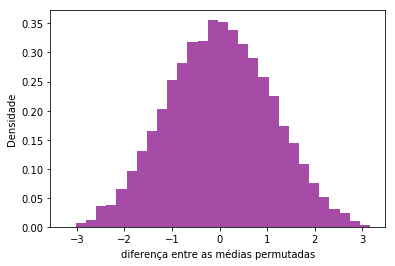

In [5]:
plt.hist(dperm, density=True, bins=30, color='purple', alpha=0.7)
plt.xlabel("diferença entre as médias permutadas")
plt.ylabel("Densidade");

**e.** Calcule o intervalo de confiança considerando a lista das diferenças entre as médias permutadas. Faça uma conclusão em termos do problema. Assuma $\gamma=95$%.

In [6]:
print('Lembrando: A diferença observada entre as médias de B e A vale', dobs, '\n')

Lembrando: A diferença observada entre as médias de B e A vale 2.3869306889285795 



In [7]:
print('Intervalo de confiança para representar a verdadeira diferença entre as médias de B e A:')
(np.percentile(dperm, 2.5), np.percentile(dperm, 97.5))

Intervalo de confiança para representar a verdadeira diferença entre as médias de B e A:


(-2.1111399236607156, 2.127824891428574)

**Conclusão:** Como a diferença entras as médias observadas de B e A $2.3869306889285795$ não faz parte do intervalo de confiança que representa as diferenças entre as médias de B e A quando os elementos são embaralhados nas duas listas, então há evidências de que calibração alterou tempo média de produção, com 95% de confiança.

**f.** Calcule o valor-p do *teste de permutação*. Faça uma conclusão em termos do problema.

**Lembre que:** 
   - O teste é bicaudal de acordo com a hipótese alterativa $H_a:\mu_B-\mu_A\neq0$;
   - Interessam os casos em que $d_{permutada}>|d_{obs}|$, ou seja, a proporção dos casos em que as diferenças entre as médias permutadas foram **maiores** do que a diferença $|d_{obs}|$ observada no item a;
   - Também interessam os casos em que $d_{permutada}<-|d_{obs}|$, ou seja, a proporção dos casos em que as diferenças entre as médias permutadas foram **menores** do que a diferença $-|d_{obs}|$ observada no item a;
   - Note que você não pode simplesmente calcular uma das duas caudas e dobrar o valor. **Por quê? Não necessariamente há simetria nas diferenças entre as médias permutadas.**

In [8]:
dperm = pd.Series(dperm)
pvalue_dir = len(dperm[dperm > np.abs(dobs)])/len(dperm)
pvalue_esq = len(dperm[dperm < -np.abs(dobs)])/len(dperm)

print('Proporção de vezes que dperm>|dobs|:', pvalue_dir)
print('Proporção de vezes que dperm<-|dobs|:', pvalue_esq)



Proporção de vezes que dperm>|dobs|: 0.01193
Proporção de vezes que dperm<-|dobs|: 0.01221


In [9]:
pvalue_total = pvalue_dir + pvalue_esq

print('Valor-p para teste bicaudal:', pvalue_total)

Valor-p para teste bicaudal: 0.02414


**Conclusão:**
Se valor-p < 𝛼, então há evidências de rejeitar H_0!
Aqui temos que valor-p < 5%, dando evidências de que calibração alterou tempo média de produção, com 95% de confiança.

___
## Motivação 2: uso do Caso 2



Um aluno comprou um acelerômetro para usar com o seu Arduino. O acelerômetro mede forças específicas em 3 eixos ortogonais, normalmente representados por x, y e z. 

Caso o eixo z esteja perfeitamente alinhado com a vertical local, irá medir a reação à gravidade, ou seja, aproximadamente $-9.8\ m/s^2$ mais um certo ruido. Já os eixos x e y, que formam um plano paralelo ao solo, devem medir:
$$x = 0\ m/s^2 + v$$ $$y = 0\ m/s^2 + w$$ 
Onde $v$ e $w$ são ruídos com uma distribuição e parâmetros desconhecidos.

Para uma melhor filtragem desses ruídos é desejável que a correlação desses ruídos seja próxima de zero. Para verificar se o acelerômetro possui ruídos descorrelacionados, o aluno realizou então 15 medidas de x e y e obteve os seguintes resultados (em $m/s^2$):

In [10]:
#dados
x =   [-1.06004531,  0.90985503,  1.01145345,  0.81447903, -0.37231968,
       -0.90004095, -2.08026056, -1.72278038, -0.32815854,  1.64216522,
        0.64785021, -0.21609776, -1.1309649 ,  1.95599004, -0.3579645]
y =   [-0.34166037,  0.25990444,  1.70860138,  0.66344894,  0.08912057,
       -0.41922063, -1.43918702, -3.07618301,  0.02229978,  1.32291735,
        0.33505524,  0.29741423, -0.54275277,  -1.47918228,  0.37008527]

print('Número de medições:', len(x))



Número de medições: 15


**a.** Calcular a correlação OBSERVADA entre x e y (correlação de Pearson):

In [11]:
robs = np.corrcoef(x,y)[0,1]
print("Correlação OBSERVADA entre x e y: %f" %robs)

Correlação OBSERVADA entre x e y: 0.564751


___
Como os dois conjuntos representam uma pequena amostra da população, não é possível inferir que essa seja a real correlação entre as duas variáveis aleatórias. Portanto é desejável aferir se realmente a correlação é zero, ou seja, os sinais são descorrelacionados, com um nível de significância de 5%.

Aqui, chamaremos de $\rho$ a verdadeira correlação entre os ruídos $v$ e $w$.

**b.** Formular a hipótese nula e a hipótese alternativa do problema:
\begin{equation*}
   H_0: \mbox{Os ruídos são descorrelacionados} \Rightarrow H_0: \rho = 0
\end{equation*}   
\begin{equation*}
   H_1: \mbox{Os ruídos são correlacionados} \Rightarrow H_1: \rho \neq 0
\end{equation*}

___
Não há qualquer informação do fabricante acerca do desvio padrão populacional. Ainda, a amostra contém poucos dados. Para concluir se a hipótese nula será ou não rejeitada, será utilizado um Teste de Permutação.

A ideia consiste em permutar os dados em uma das séries (**Caso 2** exposto acima). Logo, os novos pares de dados permutados (x,y) serão diferentes e consequentemente a correlação entre x e y também mudará. 

Para cada iteração, a nova correlação é medida e armazenada em uma lista. Ao final é possível montar um histograma que representa a distribuição das correlações entre x e y com uma das listas permutadas.

Idealmente é desejável a realização de todas as permutações possíveis, porém com $n$ valores na amostra, o número de combinações possíveis é n!=15!, ou mais de 1,3 trilhão de possibilidades, tornando a solução computacionalmente inviável.

**c.** Montar o programa para realizar o teste de permutação para 100 mil iterações. Utilizar o comando `random.shuffle()` para embaralhar apenas uma das listas de dados.

In [12]:
#Teste de permutação

#número de permutações, o ideal seria n! mas seria inviável.
P = 100000

rperm = []

#FAZER FOR QUE GUARDA CADA NOVA CORRELACAO DE UMA DAS LISTAS SHUFFLE. GUARDAR EM rperm!!

**d.** Exibir o histograma das correlações medidas no teste de permutação. Lembre-se que o valor da correlação estará contido no intervalo [-1,1].

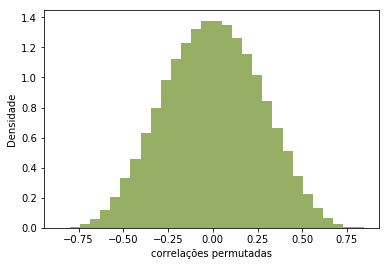

In [13]:
plt.hist(rperm, density=True, bins=30, color='olivedrab', alpha=0.7)
plt.xlabel("correlações permutadas")
plt.ylabel("Densidade");

**e.** Calcule o intervalo de confiança considerando a lista de correlações obtidas a partir da permutação de uma das listas de dados. Faça uma conclusão em termos do problema. Assuma $\gamma=95$%.

In [14]:
print('Lembrando: A correlação OBSERVADA entre x e y vale', robs, '\n')

Lembrando: A correlação OBSERVADA entre x e y vale 0.564751065753215 



In [15]:
print('Intervalo de confiança para representar a verdadeira correlação entre x e y:')
(np.percentile(rperm, 2.5), np.percentile(rperm, 97.5))

Intervalo de confiança para representar a verdadeira correlação entre x e y:


(-0.5125695120793193, 0.5057782762556893)

**Conclusão:** Como a correlação observada entras x e y é $0.564751065753215$ não faz parte do intervalo de confiança que representa as correlações entre x e y quando os elementos de uma das listas são embaralhados dando ideia de não correlacionados, então há evidências de que os ruidos são correlacionados com $95$% de confiança.

**f.** Calcule o valor-p do *teste de permutação*. Faça uma conclusão em termos do problema.

**Lembre que:** 
   - O teste é bicaudal de acordo com a hipótese alterativa $H_1:\rho\neq0$;
   - Interessam os casos em que $r_{permutadas}>|r_{obs}|$, ou seja, a proporção dos casos em que as correlações  obtidas a partir da permutação de uma das listas de dados foram **maiores** do que a correlação observada $|r_{obs}|$ no item a;
   - Interessam os casos em que $r_{permutadas}<-|r_{obs}|$, ou seja, a proporção dos casos em que as correlações  obtidas a partir da permutação de uma das listas de dados foram **menores** do que a correlação observada $-|r_{obs}|$ no item a;
   - Note que você não pode simplesmente calcular uma das duas caudas e dobrar o valor. **Por quê? Não necessariamente há simetria nas correlações obtidas a partir da permutação de uma das listas de dados.**

In [16]:
rperm = pd.Series(rperm)
pvalue_dir = len(rperm[rperm > np.abs(robs)])/len(rperm)
pvalue_esq = len(rperm[rperm < -np.abs(robs)])/len(rperm)

print('Proporção de vezes que rperm>|robs|:', pvalue_dir)
print('Proporção de vezes que rperm<-|robs|:', pvalue_esq)



Proporção de vezes que rperm>|robs|: 0.01224
Proporção de vezes que rperm<-|robs|: 0.01366


In [17]:
pvalue_total = pvalue_dir + pvalue_esq

print('Valor-p para teste bicaudal:', pvalue_total)

Valor-p para teste bicaudal: 0.0259


**Conclusão:**
Se valor-p < 𝛼, então há evidências de rejeitar H_0!
Aqui temos que valor-p < 5%, dando evidências de que calibração alterou tempo média de produção, com 95% de confiança.